## Laboratorio 3

### Parte 1. Numpy

#### 1. ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [1]:
import numpy as np

In [2]:
from sys import getsizeof

BoolArray = np.array([1]*1000, dtype = 'bool')
getsizeof(BoolArray)

1104

#### 2. Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [3]:
ParArray = np.arange(100,1,-2)
print(f'Los últimos 10 elementos del array son: {ParArray[(len(ParArray)-10):]}')

Los últimos 10 elementos del array son: [20 18 16 14 12 10  8  6  4  2]


#### 4. Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b)

In [4]:
Arr1 = np.array([1,4,2,7])
Arr2 = np.array([1,3,2,9])

ArrResta = np.array(Arr1 - Arr2)
RestaMean = np.mean(ArrResta)
print(f'La media de la resta de los arrays es {RestaMean}')

La media de la resta de los arrays es -0.25


#### 5. Tengo valores de cordenadas (x, y) en las columnasdel array
#### 1.33 4.5
#### 30.0 10.7
#### 70.2 0.5

#### Agregue a este array las coordenadas (37.1, -3.6). Muestre en pantalla las dimensiones del nuevo array

In [5]:
MatArray = np.array([[1.33,4.5],[30.0,10.7],[70.2,0.5]])
print(f'Matriz original:\n {MatArray}')
print(f'Las dimensiones de la matriz original son: {np.shape(MatArray)}')
MatArray = np.vstack([MatArray,[37.1,-3.6]])
print(f'Matriz final: \n {MatArray}')
print(f'Las dimensiones de la matriz resultante son: {np.shape(MatArray)}')

Matriz original:
 [[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]]
Las dimensiones de la matriz original son: (3, 2)
Matriz final: 
 [[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]
 [37.1  -3.6 ]]
Las dimensiones de la matriz resultante son: (4, 2)


#### 6. Copie el array del ejercicio anterior. Traspóngalo (. Agregue ahora dos nuevos pares de coordenadas: (10.8,3.0) y (35.8, 12.0)

In [6]:
MatArray2 = np.array([[1.33,4.5],[30.0,10.7],[70.2,0.5]])
MatTranspose = MatArray2.transpose()

MatTranspose = np.hstack([MatTranspose,np.transpose([[10.8,3.0],[35.8,12.0]])])
print(MatTranspose)



[[ 1.33 30.   70.2  10.8  35.8 ]
 [ 4.5  10.7   0.5   3.   12.  ]]


## Parte 2, Data Mining

In [7]:
### Cargar el dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

datos = pd.read_csv('NucleosPoblacion.csv')
datos.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


#### 1. ¿Cuántos Municipios tienen más de 100000 habitantes?

In [8]:
PobMayor = datos[datos['Poblacion']>100000]
print(f'Se tienen {len(PobMayor)} municipios con población mayor a 100000 habitantes')

Se tienen 62 municipios con población mayor a 100000 habitantes


#### 2. Realice una gráfica de barras sobre la polbación de cada ciudad, ordenela de menor a mayo y responda

##### ¿Cuál es la segunda ciudad más poblada?
##### ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

   FID  OBJECTID           Texto  Poblacion  CodMun       Municipio  \
0  307       308       Zumarraga    10037.0   20080       Zumarraga   
1  115       116  Caldas de Reis    10045.0   36005  Caldas de Reis   
2  168       169         Amurrio    10050.0    1002         Amurrio   
3  746       747  Premià de Dalt    10064.0    8230  Premià de Dalt   
4  525       526           Buñol    10077.0   46077           Buñol   

   CodProvin          Provincia         X          Y  DistanciaMadrid  
0         20          Guipúzcoa -2.323006  43.087693         2.564284  
1         36         Pontevedra -8.642007  42.605883         2.887520  
2          1              Álava -3.000073  43.054278         2.572692  
3          8          Barcelona  2.341580  41.508020         0.988031  
4         46  València/Valencia -0.789866  39.418014         1.160057  
La segunda ciudad más poblada es Barcelona
Granada se encuentra en el puesto numero 19


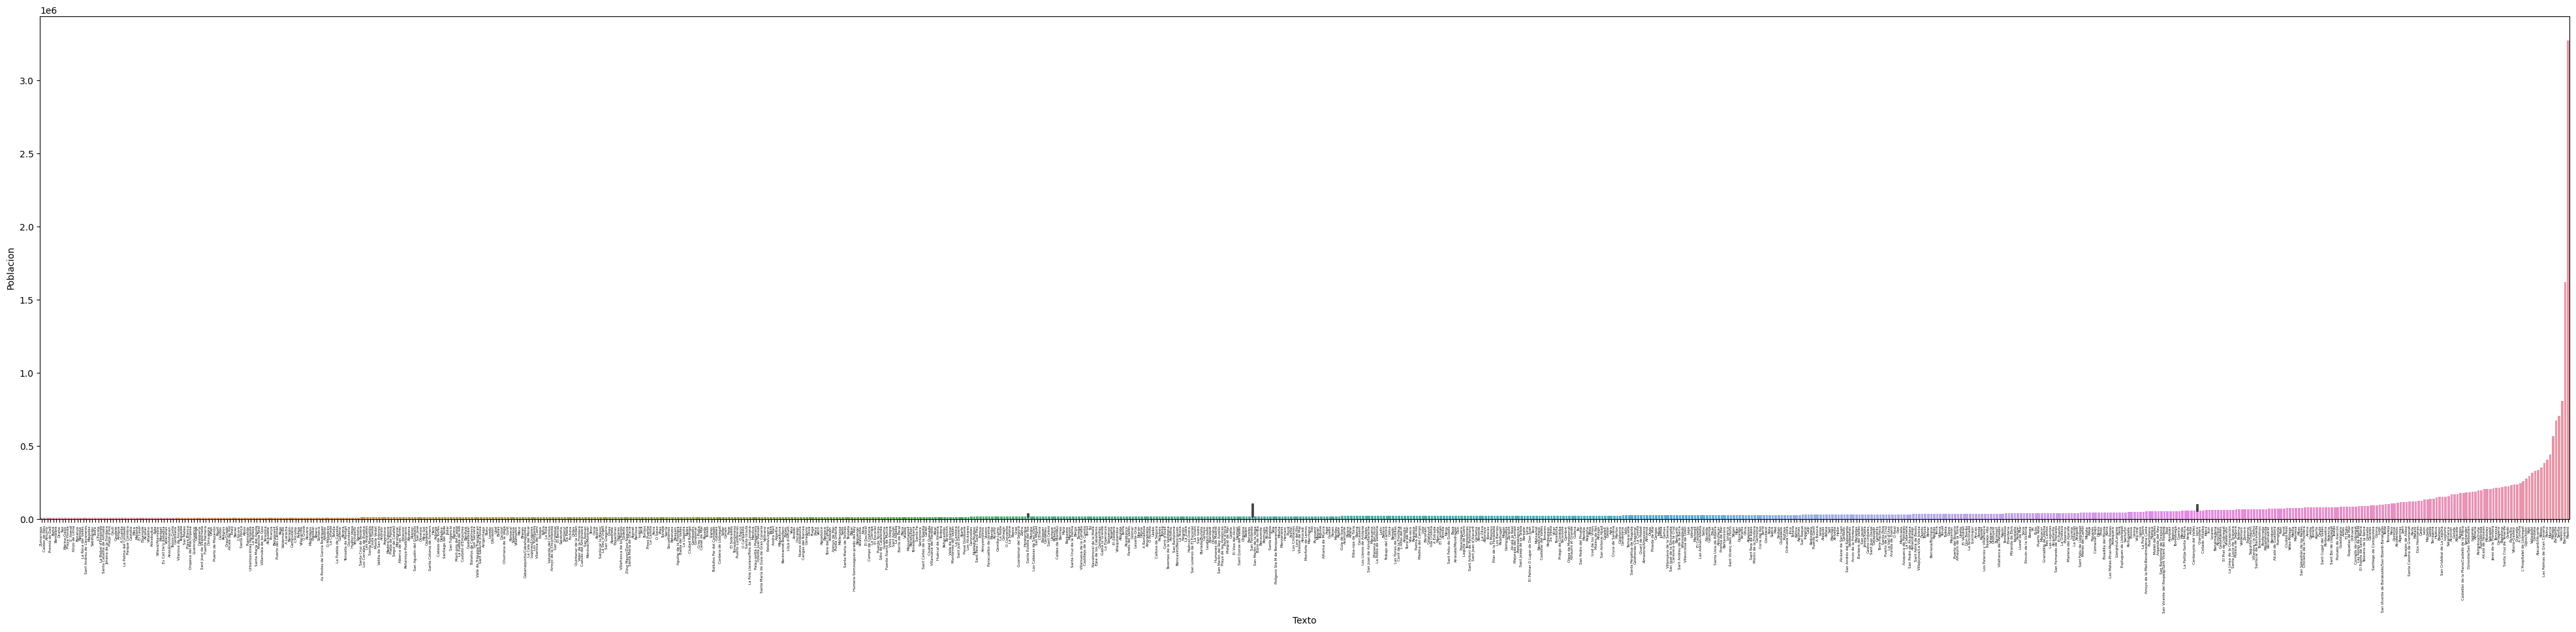

In [26]:

DatosOrdenados = datos.sort_values('Poblacion')
DatosOrdenados = DatosOrdenados.reset_index()
del DatosOrdenados['index']
DatosOrdenados = DatosOrdenados.reindex()
print(DatosOrdenados.head())

plt.figure(figsize=(50,10))
plt.xticks(rotation = 90, fontsize = 4)
sns.barplot(x = 'Texto', y = 'Poblacion', data = DatosOrdenados)
### Segunda ciudad más poblada
SegundaCiudad = DatosOrdenados.iloc[len(DatosOrdenados)-2]
Ciudad = SegundaCiudad['Texto']
print(f'La segunda ciudad más poblada es {Ciudad}')
## Dónde está granada
Granada = DatosOrdenados.loc[(DatosOrdenados.Texto == 'Granada')]
PuestoGranada = len(DatosOrdenados)-Granada.index[0] + 1
print(f'Granada se encuentra en el puesto numero {PuestoGranada}')

#### 3. ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?

In [10]:
### Extremadura está conformado por Badajoz y Cáceres
Extremadura = datos.loc[(datos.Provincia == 'Badajoz') | (datos.Provincia == 'Cáceres') & (datos.Poblacion > 5000)]
Extremadura = Extremadura.reset_index()
del Extremadura['index']
Extremadura = Extremadura.reindex()
print(f'En Extremadura (Badajoz y Cáceres) hay {len(Extremadura)} municipios cuya población es mayor a 5000')


En Extremadura (Badajoz y Cáceres) hay 14 municipios cuya población es mayor a 5000


#### 4. ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [11]:
YmasNorte = max(datos['Y'])
MasNorte = datos.loc[(datos.Y == YmasNorte)]
MasNorte = MasNorte.reset_index()
del MasNorte['index']
MasNorte = MasNorte.reindex()
print(f"El municipio más al norte es {MasNorte.Municipio[0]}, pertenece a la provincia {MasNorte.Provincia[0]} y tiene {MasNorte.Poblacion[0]} habitantes")

El municipio más al norte es Viveiro, pertenece a la provincia Lugo y tiene 16211.0 habitantes


#### 5. Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada

In [12]:
DatosGranada = datos.loc[(datos.Provincia == 'Granada')]
PoblacionGranda = np.array(DatosGranada.Poblacion)
print(DatosGranada.Poblacion.describe())
GranadaMean = np.mean(PoblacionGranda)
GranadaSTD = np.std(PoblacionGranda)
GranadaMediana = np.median(PoblacionGranda)
GranadaMax = np.max(PoblacionGranda)
GranadaMin = np.min(PoblacionGranda)
print(f'Población media de Granada: {GranadaMean}\n')
print(f'Desviación estándar de la población de Granada: {GranadaSTD}\n')
print(f'Mediana de la población de Granada: {GranadaMediana}\n')
print(f'Población máxima en un pueblo de Granada: {GranadaMax}\n')
print(f'Población mínima en un pueblo de Granada: {GranadaMin}\n')

count        20.000000
mean      30217.850000
std       50355.491715
min       10386.000000
25%       13146.500000
50%       17526.000000
75%       21739.750000
max      239154.000000
Name: Poblacion, dtype: float64
Población media de Granada: 30217.85

Desviación estándar de la población de Granada: 49080.462187386736

Mediana de la población de Granada: 17526.0

Población máxima en un pueblo de Granada: 239154.0

Población mínima en un pueblo de Granada: 10386.0



#### 6. Realice un histograma con la población de los Municipios para cada una de las provincias

<Figure size 640x480 with 0 Axes>

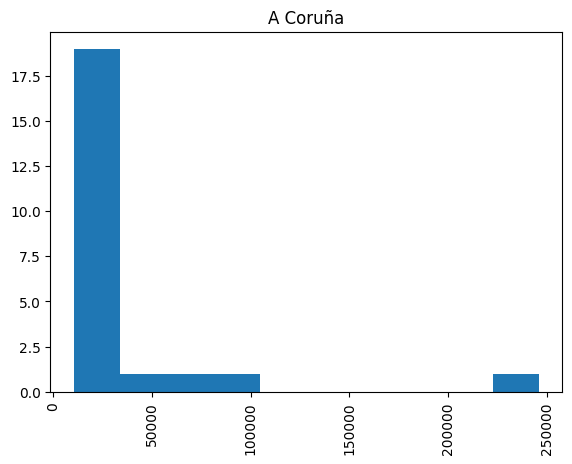

<Figure size 640x480 with 0 Axes>

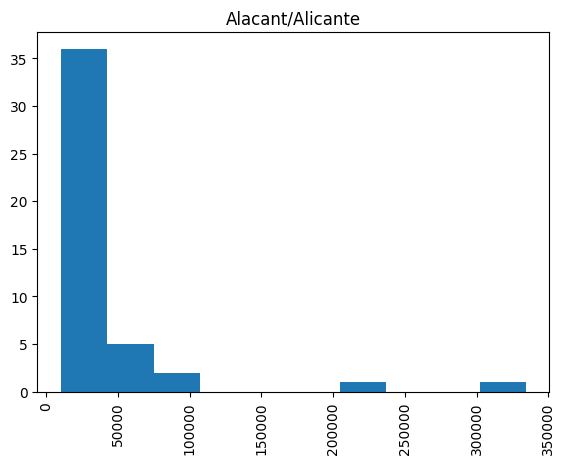

<Figure size 640x480 with 0 Axes>

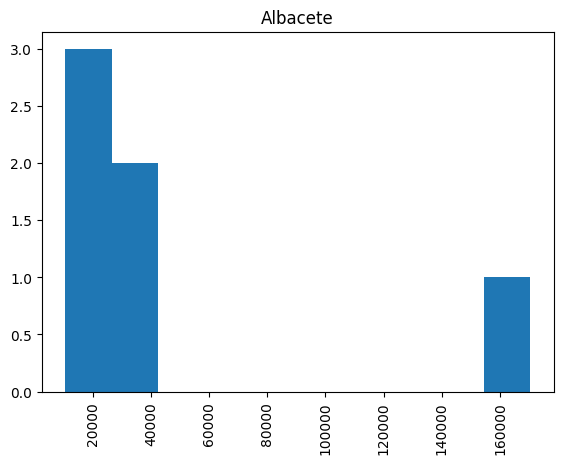

<Figure size 640x480 with 0 Axes>

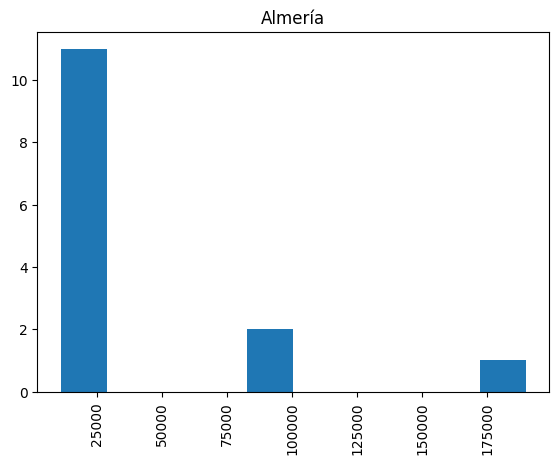

<Figure size 640x480 with 0 Axes>

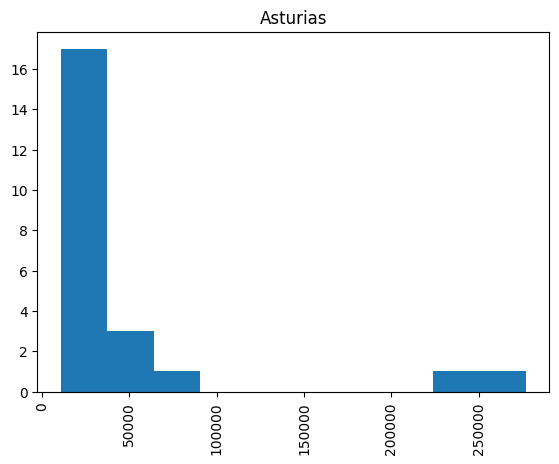

<Figure size 640x480 with 0 Axes>

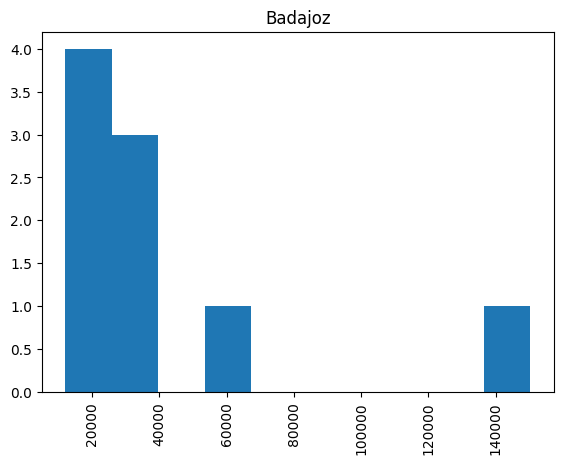

<Figure size 640x480 with 0 Axes>

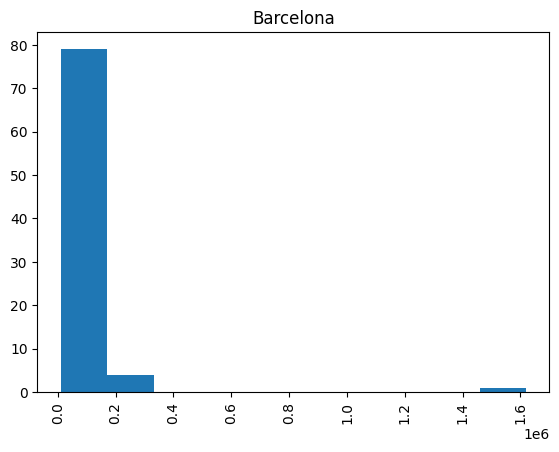

<Figure size 640x480 with 0 Axes>

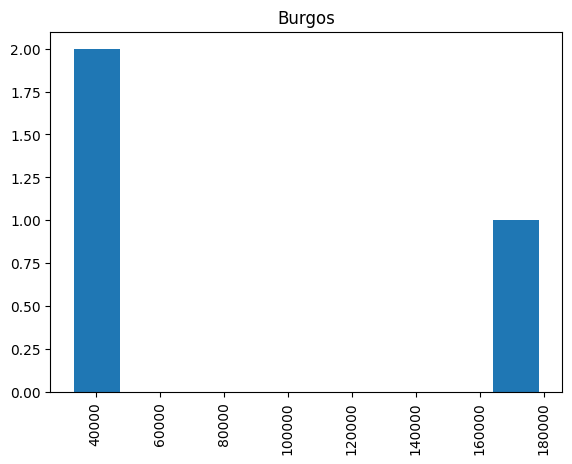

<Figure size 640x480 with 0 Axes>

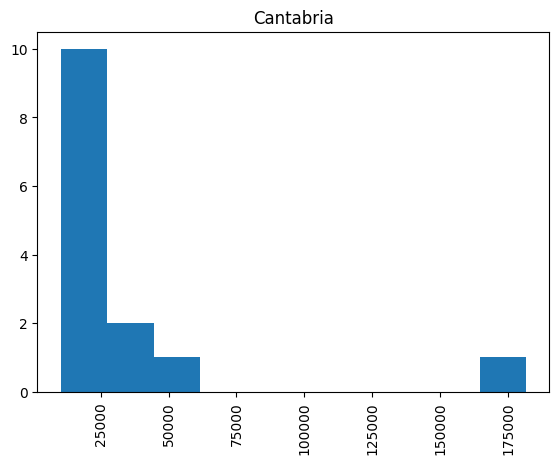

<Figure size 640x480 with 0 Axes>

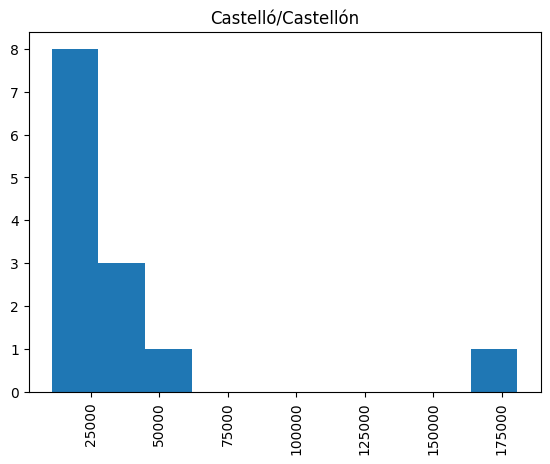

<Figure size 640x480 with 0 Axes>

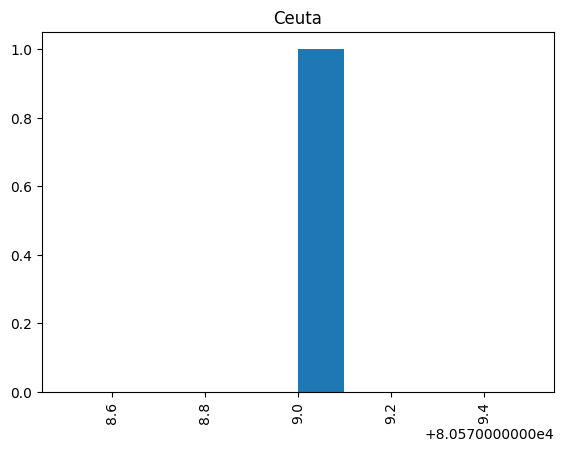

<Figure size 640x480 with 0 Axes>

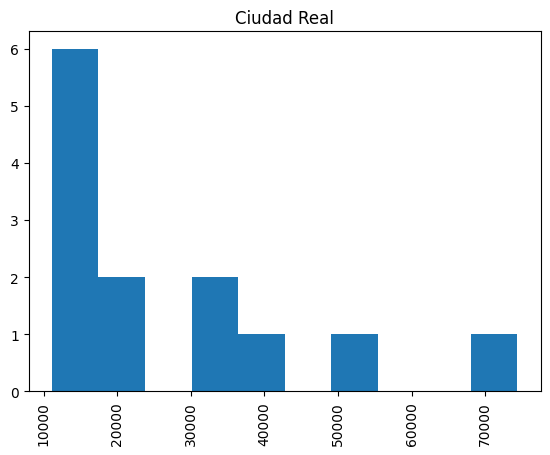

<Figure size 640x480 with 0 Axes>

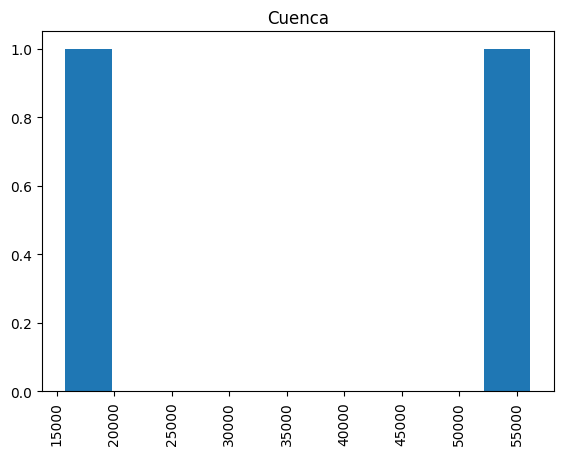

<Figure size 640x480 with 0 Axes>

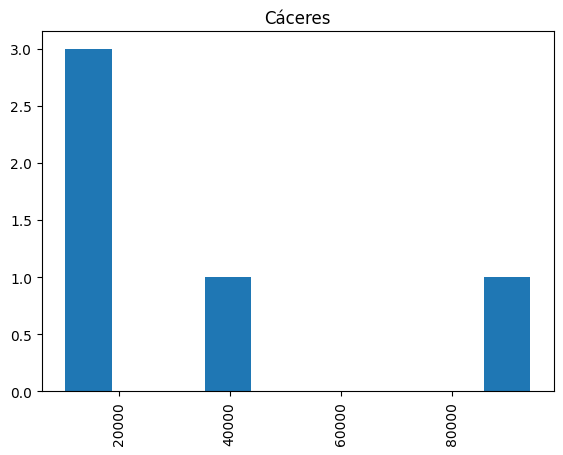

<Figure size 640x480 with 0 Axes>

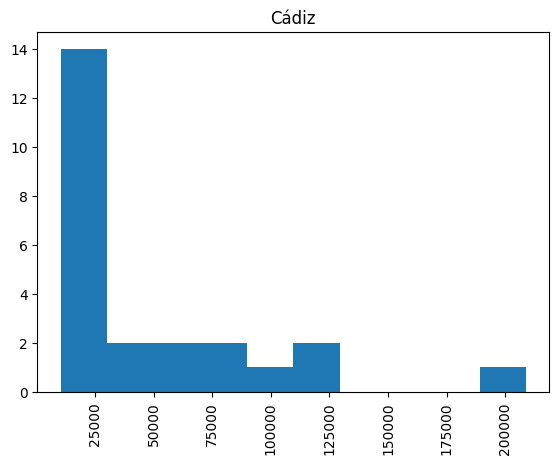

<Figure size 640x480 with 0 Axes>

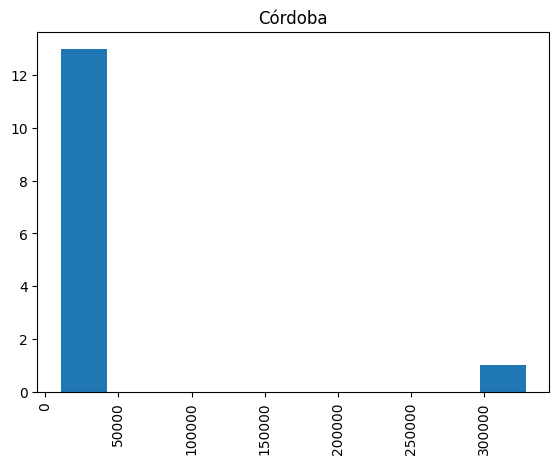

<Figure size 640x480 with 0 Axes>

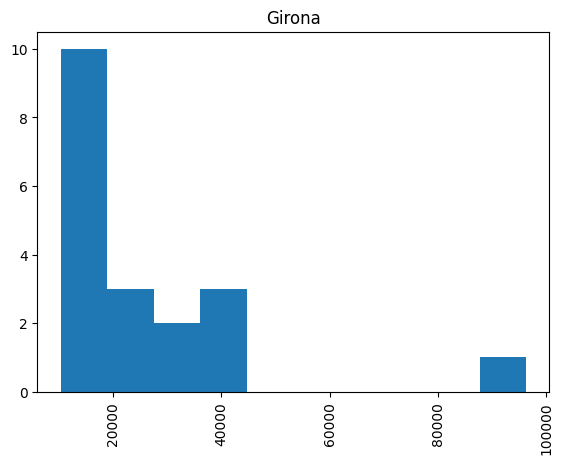

<Figure size 640x480 with 0 Axes>

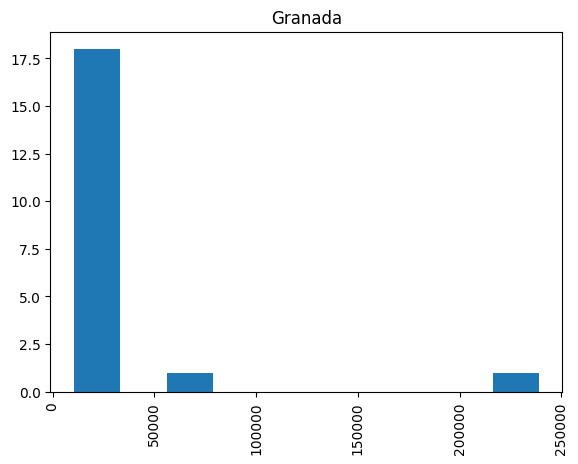

<Figure size 640x480 with 0 Axes>

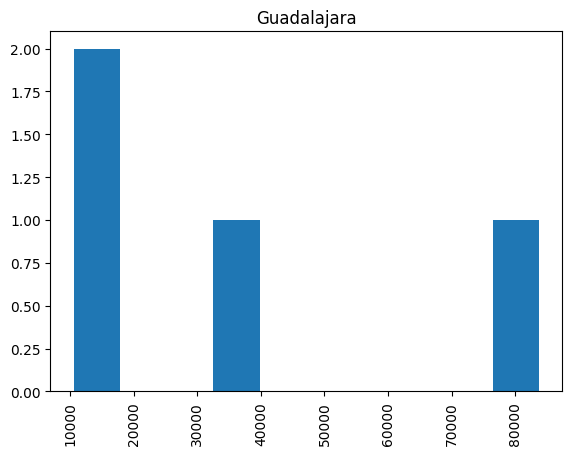

<Figure size 640x480 with 0 Axes>

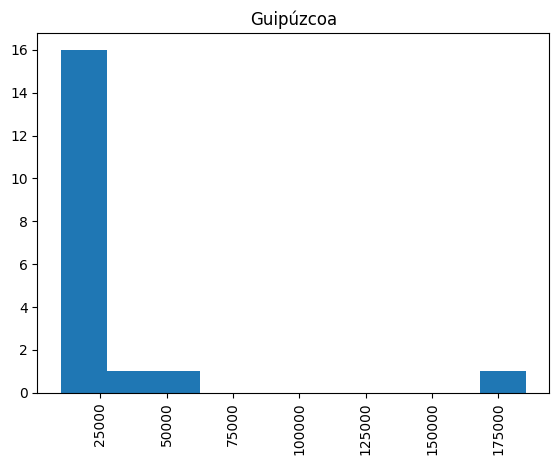

<Figure size 640x480 with 0 Axes>

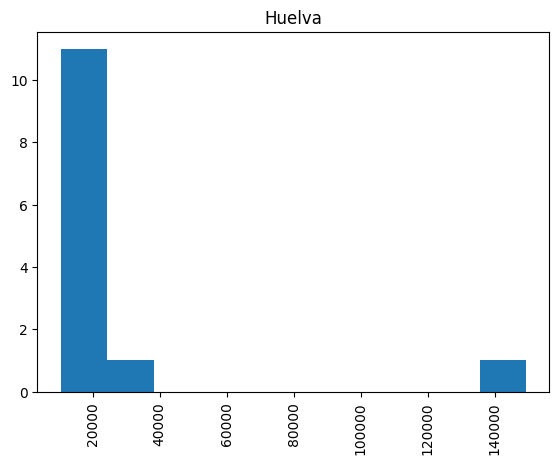

<Figure size 640x480 with 0 Axes>

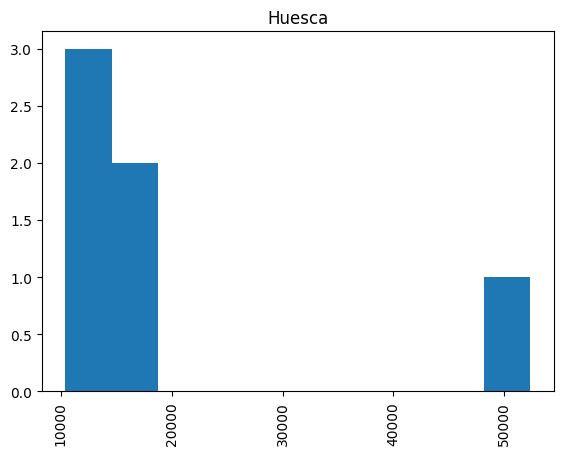

<Figure size 640x480 with 0 Axes>

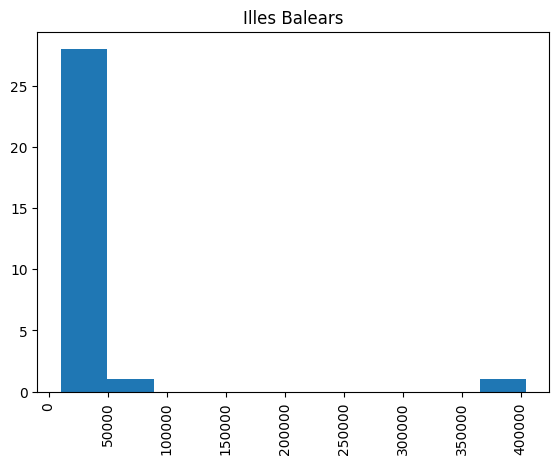

<Figure size 640x480 with 0 Axes>

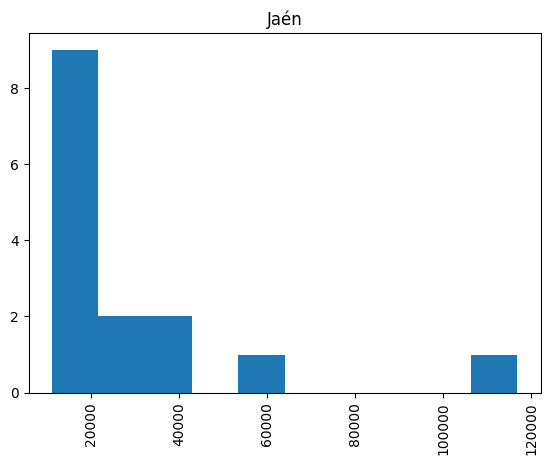

<Figure size 640x480 with 0 Axes>

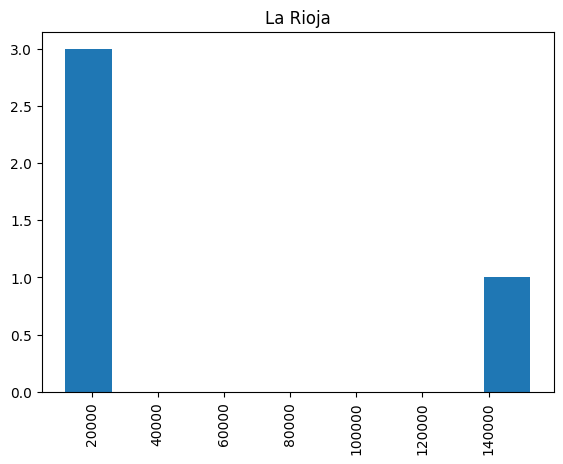

<Figure size 640x480 with 0 Axes>

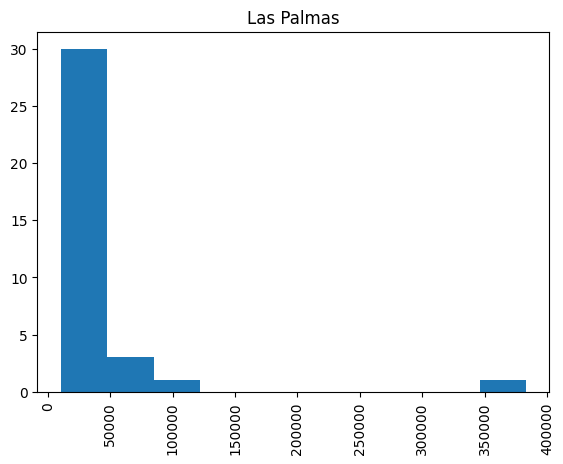

<Figure size 640x480 with 0 Axes>

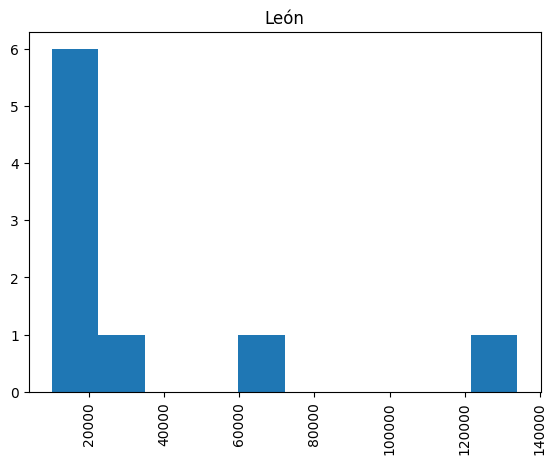

<Figure size 640x480 with 0 Axes>

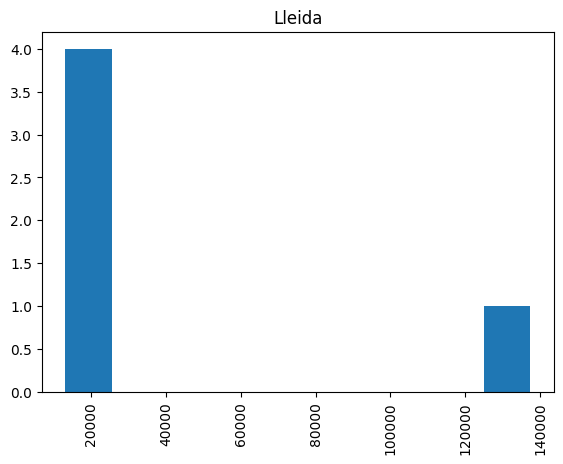

<Figure size 640x480 with 0 Axes>

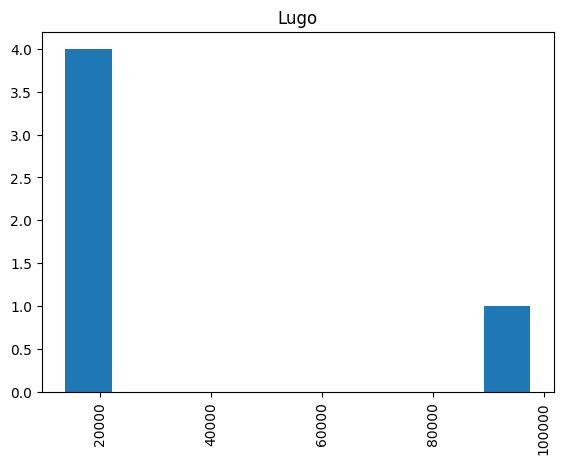

<Figure size 640x480 with 0 Axes>

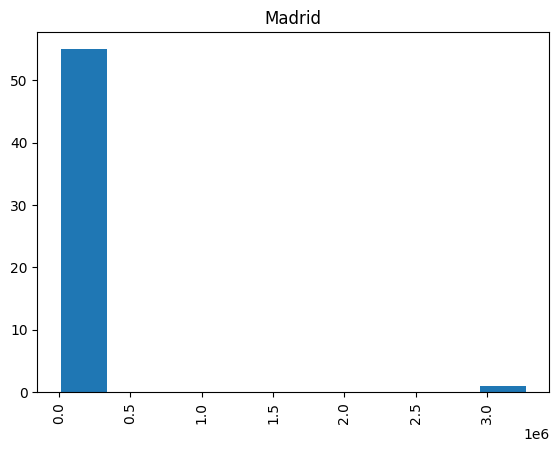

<Figure size 640x480 with 0 Axes>

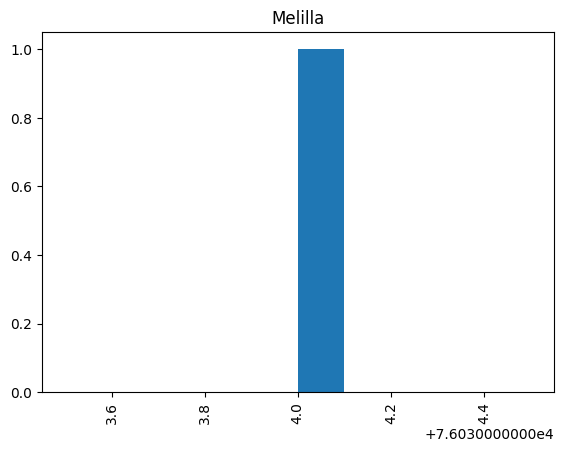

<Figure size 640x480 with 0 Axes>

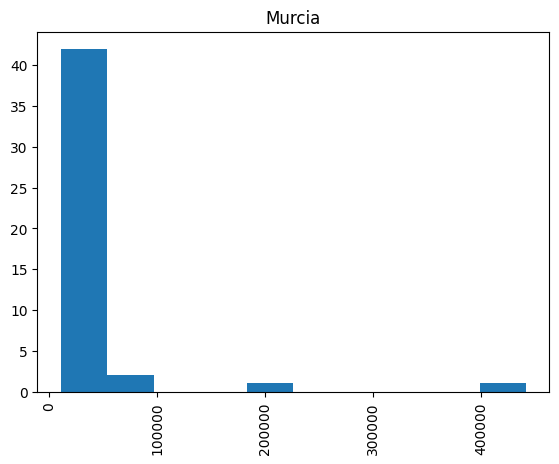

<Figure size 640x480 with 0 Axes>

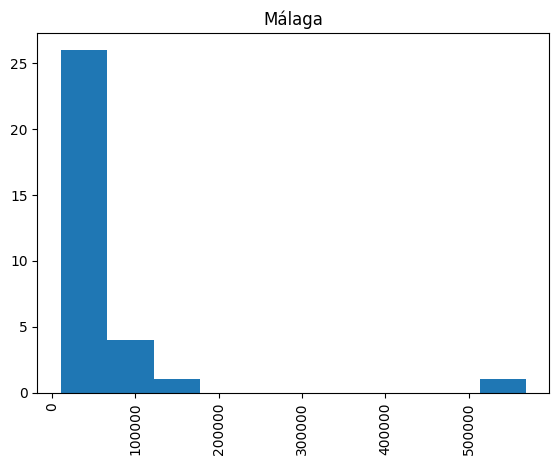

<Figure size 640x480 with 0 Axes>

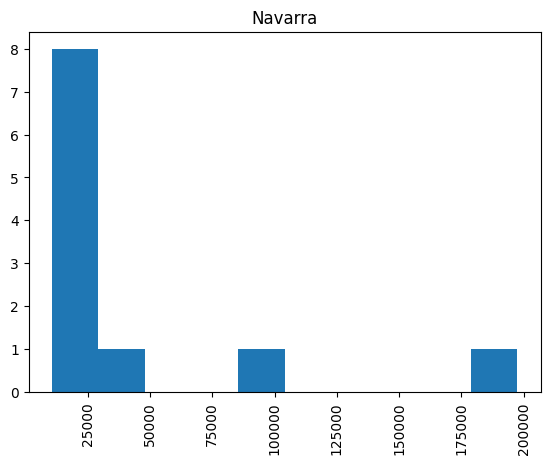

<Figure size 640x480 with 0 Axes>

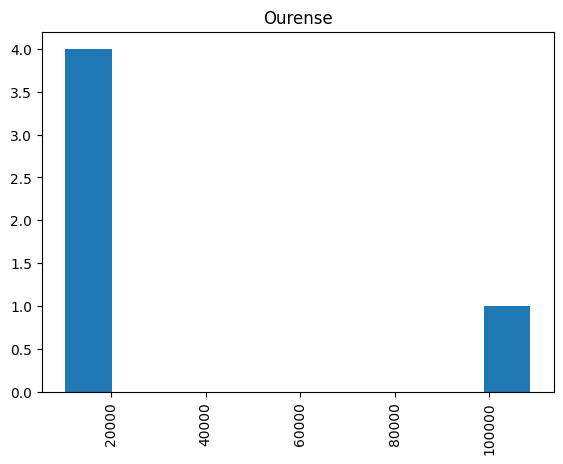

<Figure size 640x480 with 0 Axes>

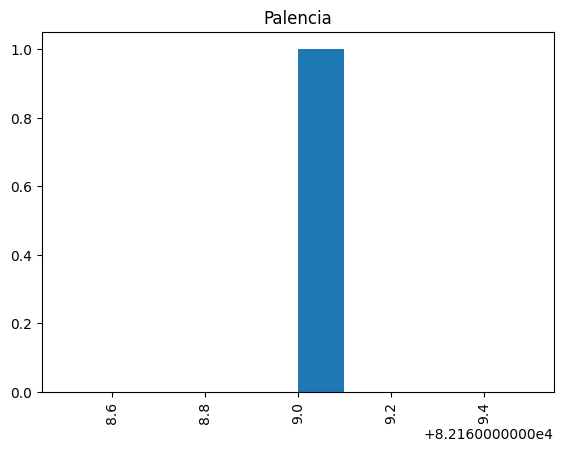

<Figure size 640x480 with 0 Axes>

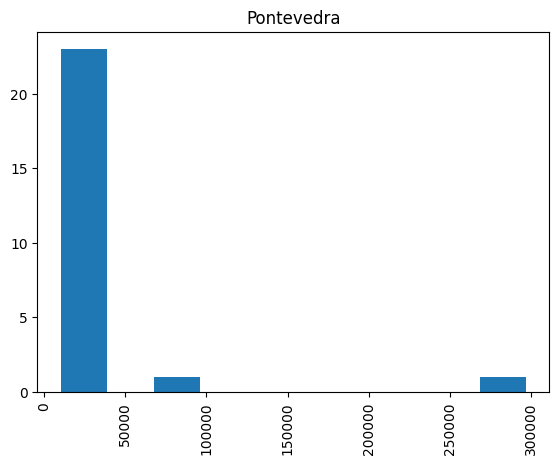

<Figure size 640x480 with 0 Axes>

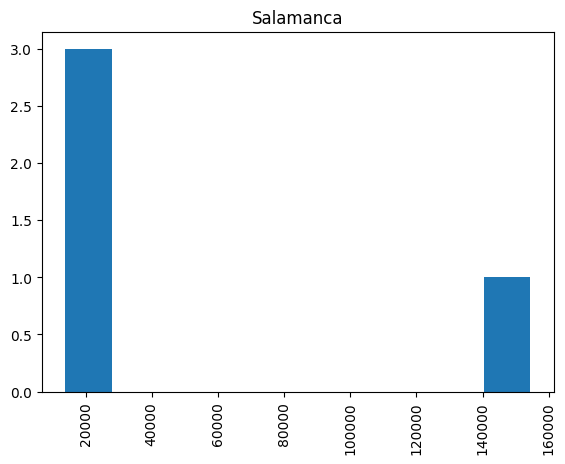

<Figure size 640x480 with 0 Axes>

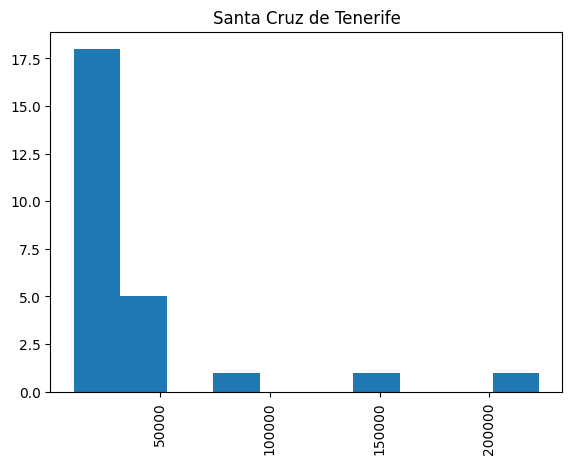

<Figure size 640x480 with 0 Axes>

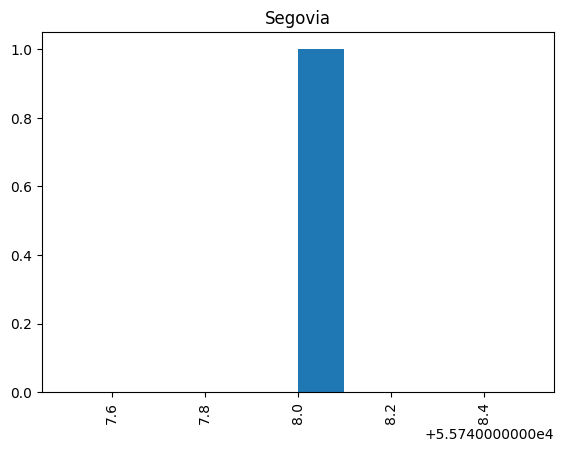

<Figure size 640x480 with 0 Axes>

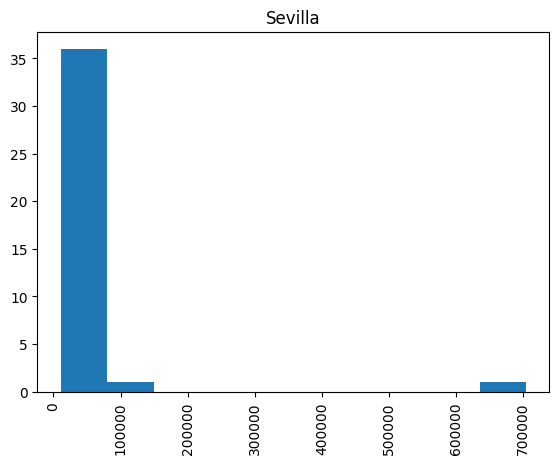

<Figure size 640x480 with 0 Axes>

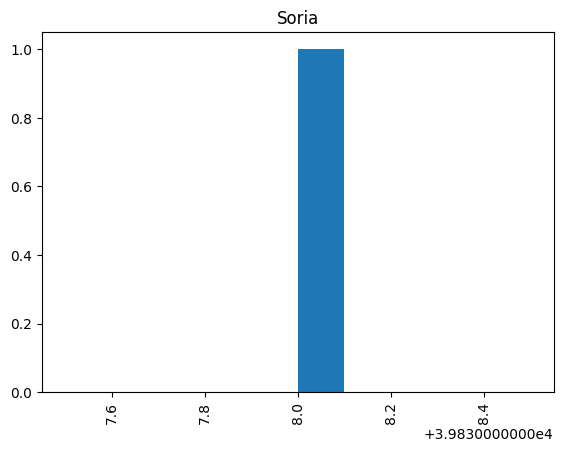

<Figure size 640x480 with 0 Axes>

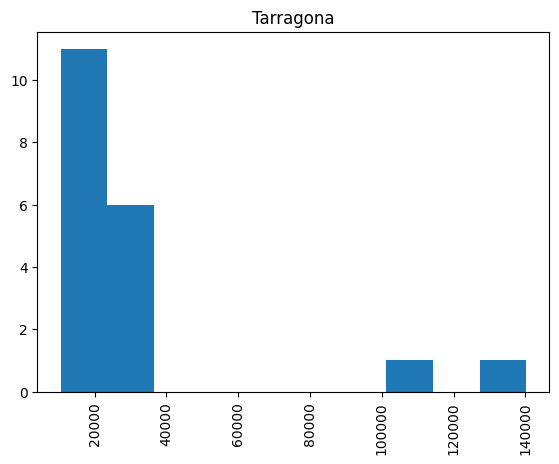

<Figure size 640x480 with 0 Axes>

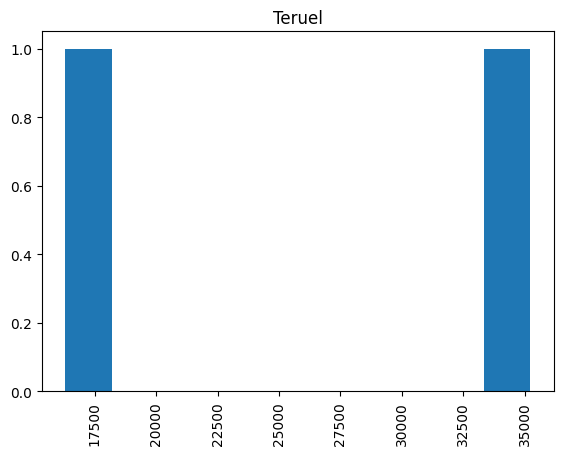

<Figure size 640x480 with 0 Axes>

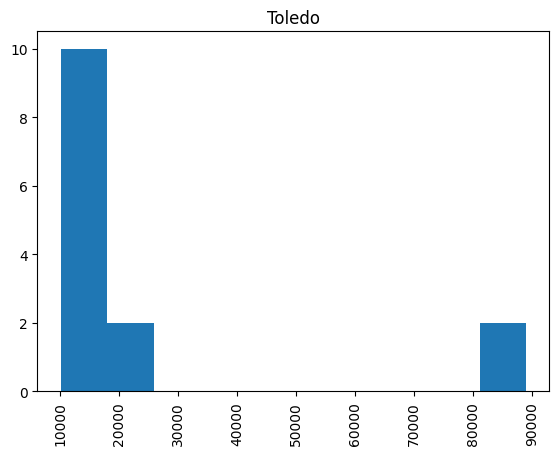

<Figure size 640x480 with 0 Axes>

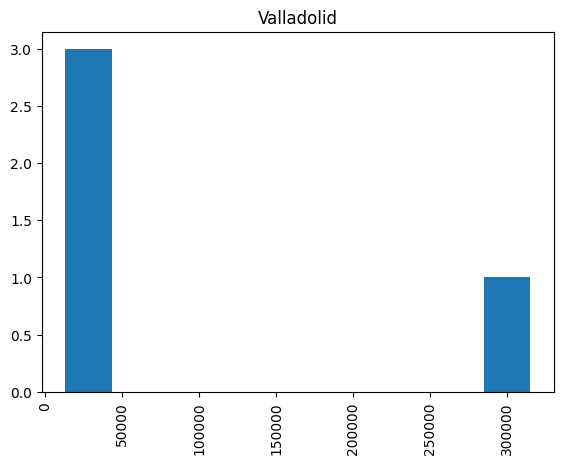

<Figure size 640x480 with 0 Axes>

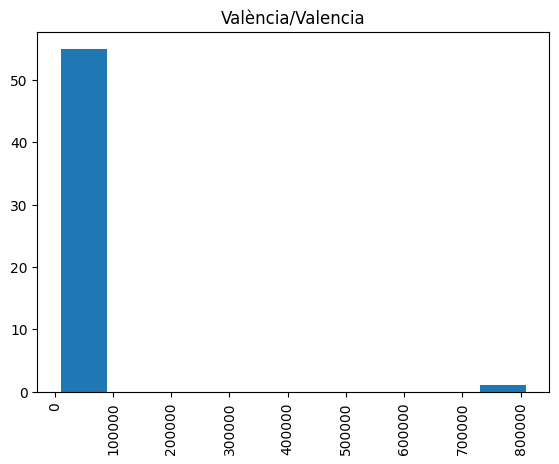

<Figure size 640x480 with 0 Axes>

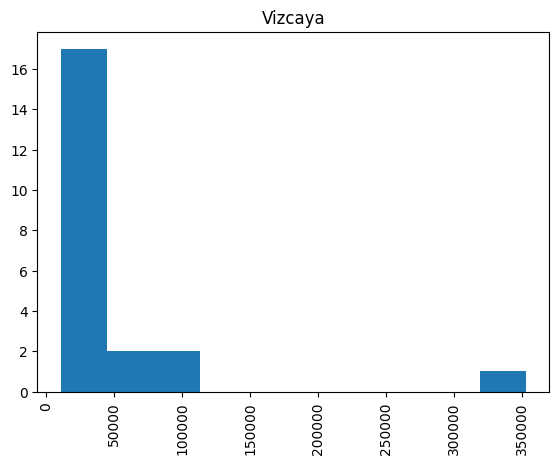

<Figure size 640x480 with 0 Axes>

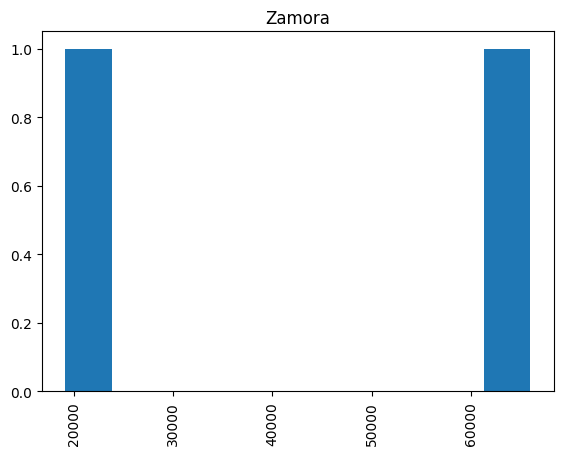

<Figure size 640x480 with 0 Axes>

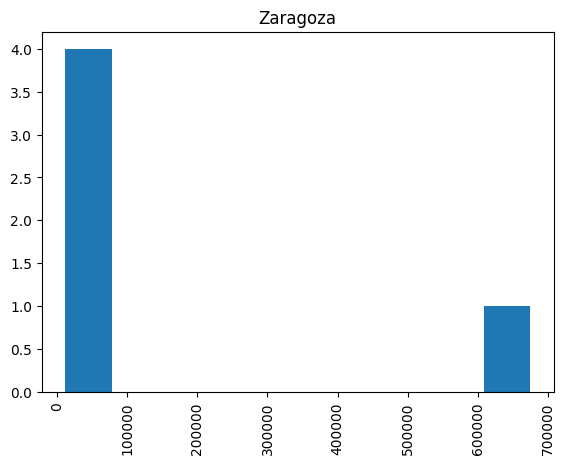

<Figure size 640x480 with 0 Axes>

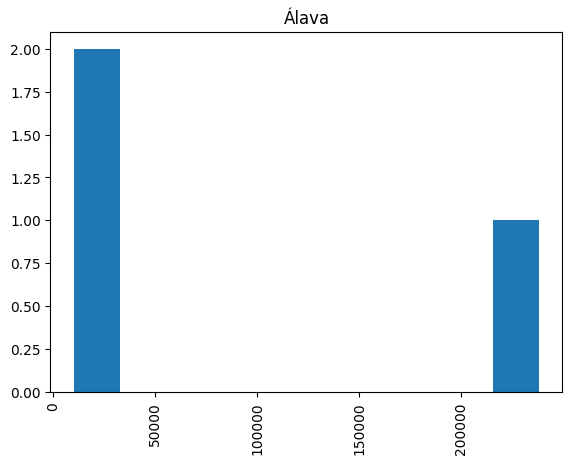

<Figure size 640x480 with 0 Axes>

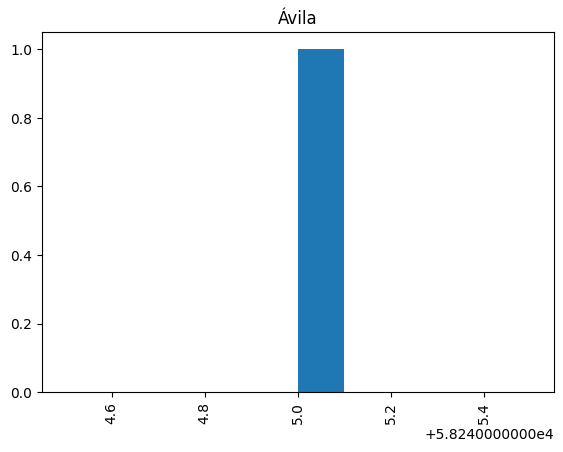

In [14]:
datosProvincia = datos.groupby('Provincia')
#Provincia[1].Provincia

for indexProv, Provincia in enumerate(datosProvincia):
    plt.figure()
    Provincia[1].Poblacion.hist(by=Provincia[1].Provincia)
    #sns.histplot(x = Provincia[1].Municipio, y =Provincia[1].Poblacion)
    plt.show()
    #(Provincia[1].Poblacion)
    


### 7. Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?

In [15]:
DatosShuffle = datos.sample(n = 50, ignore_index = True)
ShufflePoblacion = np.array(DatosShuffle['Poblacion'])
PobAvg = np.mean(ShufflePoblacion)
PobStd = np.std(ShufflePoblacion)
print(f'Población promedio de la muestra: {PobAvg}')
print(f'Desviación estándar de la muestra: {PobStd}')

Población promedio de la muestra: 30561.94
Desviación estándar de la muestra: 36515.55670363524


#### 8. Dígame los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero

In [16]:
XMadrid = datos.loc[(datos.Municipio)=='Madrid']
XMadrid = XMadrid.reset_index()
del XMadrid['index']
XMadrid = XMadrid.reindex()
CoordX =  XMadrid.X[0]

YMadrid = datos.loc[(datos.Municipio)=='Madrid']
YMadrid = YMadrid.reset_index()
del YMadrid['index']
YMadrid = YMadrid.reindex()
CoordY = YMadrid.Y[0]

DistMadrid = np.sqrt(CoordX**2 + CoordY**2)
DistMuniQ = np.power(datos['X'],2) + np.power(datos['Y'],2)
DistMuni = np.sqrt(DistMuniQ)
DistdeMadrid = abs(DistMuni - DistMadrid)
DatosDist = datos
DatosDist['DistanciaMadrid'] = DistdeMadrid
DatosDist = DatosDist.sort_values('DistanciaMadrid', ignore_index= True)

MunisCerca = DatosDist.iloc[1:9]
nombres = []
for value in MunisCerca['Municipio']:
    nombres.append(value)
print(f'Los municipios más cercanos a Madrid son: {nombres}')


Los municipios más cercanos a Madrid son: ['Coslada', 'San Fernando de Henares', 'Boadilla del Monte', 'Pozuelo de Alarcón', 'Torrejón de Ardoz', 'Pozuelo de Alarcón', 'Boadilla del Monte', 'Alcalá de Henares']
